<h1 align='center' style="color: blue;">Supervised Learning - Part II</h1>

## 1. Cross Validation 

<p> So far, we have split our dataset into training and test sets to test performance of oyr models. In doing that, we have used train set to biuld the model (using fit function) and then test the model using test set (usuing predict function) and then evaluate our model usining accuracy, precision, recall and F1 measures (for classification) and MSE and $R^2$ for regression.</p>

<p>However, the above approach only use one set of data for testing purposes and may not provide reliable result. On approach to mitigagte this problem is to use cross validation. Cross validation is a statistical method that splits data repeatedly and train multiple methods. The most common version of cross validation is <i><b>K-fold cross validation</b></i> where k is user-specified number, usually 5 or 10. In order to apply K-fold cross validation, the data should be partitioned into k parts of (approximately) equal size, called folds. Next, to test the performance of models, we have to build our model using (K-1)-folds and test the model using on remaining fold. This process allows us to built and test K models instead of just one model. In the general model of cross validation, you do not shuffle the data.</p>

<div><img src='https://www.dummies.com/wp-content/uploads/9781119245513-fg1104.jpg'></div>

<p><b>Note:</b> In order to use cross validation method in your work you need to use <b style="color:blue">cross_val_score( )</b> function.</p>  

<p><b>Note:</b> We can aggregate the K captured result using <b style="color:blue">mean</b> or <b style="color:blue">median</b> functions</p>

<p><b>Example:</b> Let's use cross validation to test predictive performance of logistic regression and KNN on Wisconsin Breast Cancer dataset.</p>

In [6]:
# import basic packages
%matplotlib inline 
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [7]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

breast_cancer_dataset = datasets.load_breast_cancer()

X = breast_cancer_dataset.data       
y = breast_cancer_dataset.target            # 0 -> Malignant ; 1 -> Benign

logreg_model = LogisticRegression(solver='liblinear')
KNN_model = KNeighborsClassifier(n_neighbors=3)

In [8]:
accuracy_logreg = cross_val_score(logreg_model, X, y, cv=5, scoring='accuracy')
print("Cross Validation Scores for Log Reg: {}".format(accuracy_logreg))
print("Mean Accuracy Score for Log Reg: {}".format(np.mean(accuracy_logreg)))
print()

accuracy_KNN = cross_val_score(KNN_model, X, y, cv=5, scoring='accuracy')
print("Cross Validation Scores for Log KNN: {}".format(accuracy_KNN))
print("Mean Accuracy Score for KNN: {}".format(np.mean(accuracy_KNN)))

Cross Validation Scores for Log Reg: [0.93043478 0.93913043 0.97345133 0.94690265 0.96460177]
Mean Accuracy Score for Log Reg: 0.9509041939207385

Cross Validation Scores for Log KNN: [0.87826087 0.92173913 0.94690265 0.9380531  0.91150442]
Mean Accuracy Score for KNN: 0.9192920353982302


<p><b>Note:</b> You can change the scoring parameter to your desired method such as <b>precison</b>, <b>recall</b> or <b>f1</b>.<p>

<b>Question:</b> What if we want to get all the measures? Newer version of scikit-learn allows you to compute the multiple scores for the cross validation using <b style='color:blue'>cross_validate</b> function

In [9]:
from sklearn.model_selection import cross_validate

scoring = {'acc': 'accuracy',
           'prec': 'precision',
           'rec': 'recall',
           'f1':'f1'}

scores = cross_validate(logreg_model,  X, y, scoring=scoring, cv=5, 
                        return_train_score=False)

In [5]:
scores

{'fit_time': array([0.00630593, 0.00604701, 0.00744438, 0.00628805, 0.00607109]),
 'score_time': array([0.00408506, 0.00273776, 0.00241995, 0.00293803, 0.00307679]),
 'test_acc': array([0.93043478, 0.93913043, 0.97345133, 0.94690265, 0.96460177]),
 'test_prec': array([0.91025641, 0.93333333, 0.97222222, 0.95774648, 0.98550725]),
 'test_rec': array([0.98611111, 0.97222222, 0.98591549, 0.95774648, 0.95774648]),
 'test_f1': array([0.94666667, 0.95238095, 0.97902098, 0.95774648, 0.97142857])}

### 1.1. Stratified Cross Validation 

<p>Splitting the dataset into K folds by keeping the order of data as descibed in previous section, might not always be a good idea. That can cause imbalance in the number of observation from different classes in the training set and may lead to inaccurate result. One way to handle that is to use <b>stratified cross validation</b> method. In this method the data is split to different parts in a way that proportions between classes remain the same in each fold as they are in whole dataset. </p>

<div><img src='https://4.bp.blogspot.com/-LCDSJqEIBD0/WNyFVsCMjUI/AAAAAAAAWgg/-WWM7irOuKcnWl41qO1r4tEsAD_9HEskwCLcB/s1600/3846_2.PNG'></div>

<p><b>Note:</b> You need to use <b style='color:blue'>StratifiedKFold( )</b> to form your desired number of stratified partitions and then pass that to the <b>cv</b> parameter inside the <b style='color:blue'>cross_val_score( )</b> function.</p>

<p><b>Example:</b></p>

In [7]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
accuracy_logreg = cross_val_score(logreg_model, X, y, cv=cv, scoring='accuracy')

print("Cross Validation Scores for Log Reg: {}".format(accuracy_logreg))
print("Mean Accuracy Score for Log Reg: {}".format(np.mean(accuracy_logreg)))

Cross Validation Scores for Log Reg: [0.97391304 0.93043478 0.9380531  0.96460177 0.95575221]
Mean Accuracy Score for Log Reg: 0.9525509811465949


In [8]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
accuracy_KNN = cross_val_score(KNN_model, X, y, cv=cv, scoring='accuracy')

print("Cross Validation Scores for Log KNN: {}".format(accuracy_KNN))
print("Mean Accuracy Score for KNN: {}".format(np.mean(accuracy_KNN)))

Cross Validation Scores for Log KNN: [0.91304348 0.94782609 0.92920354 0.92035398 0.92920354]
Mean Accuracy Score for KNN: 0.9279261254328588


### 1.2. Grid Search with Cross-Validation

<p>In some cases deciding about the hyper-parameters becomes very critical point in formation of your model. For example, when you are using KNN to form your predictive model, the selection of right number of neighbors is crucial.  One simple approach is to run your model with different number of neighbors and compare the accuracy score across models. However, this approach becomes really inefficient if you have large set of hyperparameters to test.</p>

<p>Grid search with cross validation allows you to specify different hyperparameters' values and test the performance of each separately using cross validation method. Let's see an example for KNN model.</p>

In [9]:
from sklearn.model_selection import GridSearchCV

KNN_model = KNeighborsClassifier()

param_grid = {'n_neighbors': [1,2,3,4,5,6]}
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
grid = GridSearchCV(KNN_model, param_grid, cv = cv, scoring='accuracy',
                    return_train_score=True)
grid.fit(X, y)

print("Best Parameter: {}".format(grid.best_params_))
print("Best Cross Vlidation Score: {}".format(grid.best_score_))

Best Parameter: {'n_neighbors': 3}
Best Cross Vlidation Score: 0.9279437609841827


## 2. Support Vector Machines (SVM)

<p>Powerful class of supervised algorithms for both <u>classification</u> and <u>regression</u>.</p>

### 2.1. SVM for Classification

#### 2.1.1. Linear Classification

<p>The idea behind SVM is to find a linear discriminative classifier that separates two sets of data, and thereby create a model for classification. However, almost in all cases, there is more than one possible dividing line that can perfectly discriminate between the two classes. Let's see an example for a two-dimensional case.</p>

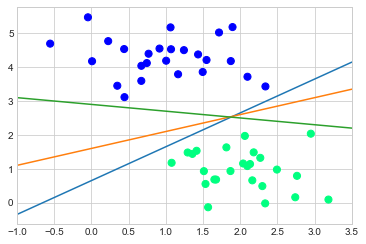

In [92]:
from sklearn.datasets.samples_generator import make_blobs 
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

xfit = np.linspace(-1, 3.5)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]: 
    plt.plot(xfit, m * xfit + b)
    
plt.xlim(-1, 3.5)
plt.show()

<p> To solve this issue, SVM offers rather than simply drawing a zero-width line between the classes, we can draw around each line a margin of some width, up to the nearest point and select the line with maximum margin. Let's see the last example again.</p>

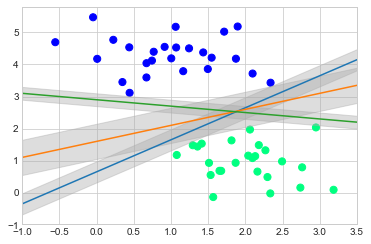

In [96]:
xfit = np.linspace(-1, 3.5)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]: 
    yfit=m*xfit+b
    plt.plot(xfit, yfit)
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA',alpha=0.4)
    
plt.xlim(-1, 3.5)
plt.show()

<p><b>Question: </b>Which of the above lines has the largest margin?</p>

<p> OK, now let's use SVM model to find the best solution. </p>

In [97]:
from sklearn.svm import SVC # "Support vector classifier" 
model = SVC(kernel='linear', C=1E10) # Here, we set two hyperparameters, we will discuss about that mode
model.fit(X, y)                  # There are some other hyperparameters that you can study about them more by yourself

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [98]:
# Here is a function that can help us to draw decision boundary for SVM  
# You don't need to understand details of this function
def plot_svc_decision_function(model, ax=None, plot_support=True): 
    """Plot the decision function for a two-dimensional SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30) 
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], 
                   model.support_vectors_[:, 1], s=300, 
                   linewidth=1, edgecolors='black', facecolor='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

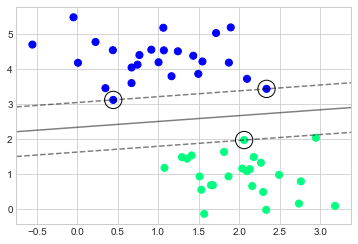

In [102]:
# visualize the model
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter' )
plot_svc_decision_function(model)
plt.show()

<p><b>Note:</b> Notice that only three training points are on the margin lines. A key to this classifier’s success is that for the fit, only the position of the support vectors matters; any points further from the margin that are on the correct side do not modify the fit! These points known as the support vectors, and give the algorithm its name. You can check these points using <b style="color:red">support_vectors_</b> property.</p>

In [15]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

<p><b>Note:</b> You can also check the number of support for each class by useing <b style="color:red"> n_support_</b> property.</p>

In [103]:
model.n_support_

array([2, 1], dtype=int32)

<p>Let's see that in an interactive format to check the role of suport vectors</p>

In [116]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=300, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter') 
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)
    
from ipywidgets import interact, fixed 
interact(plot_svm, N=[10, 30, 50, 120, 150, 200, 300], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 30, 50, 120, 150, 200, 300), value=10), Output())…

#### 2.1.2. Nonlinear Classification

<p>However, it is not always possible to separate different classes using linear boundaries. Let's consider the following example.</p>

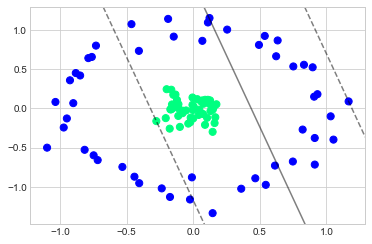

In [123]:
from sklearn.datasets.samples_generator import make_circles 
X, y = make_circles(100, factor=.1, noise=.1, random_state=0)
model = SVC(kernel='linear')
model.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(model, plot_support=False);

<p><b>Note:</b> SVM becomes extremely powerful when it is combined with nonlinear kernels. The main idea is to project data to higher dimension such that we can separate different classes using linear separator. One common approach is to use radial basis function (rbf) centered on the middle clump to create additional dimension. Here is the formula:</p>
<div style='text-align:center; font-size:14pt'>$r_i = e^{\sum_{j=1}^{m} {x_i^{(j)}}^2}$</div>

In [126]:
# here is the quick implementation of the above formula using numpy
r = np.exp(-(X ** 2).sum(axis = 1))

<p><b>Complementary Note:</b> The above code allows us to add another dimension (r) to our two dimensional data in previous example. Let's visulaize data in three dimension.</p>

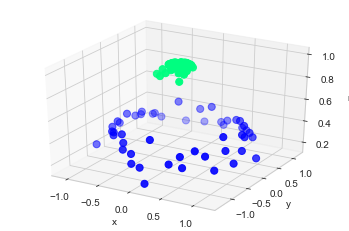

In [129]:
from mpl_toolkits import mplot3d
ax = plt.subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='winter')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r');

<p>We can see that with this additional dimension, the data becomes linearly separable, by drawing a separating surface. But it is not possible to separate all type of data using the middle clump projection. Then what should we do? The answer is <u>kernel transformation</u>.</p>

<p>Let's apply 'rbf' kernel transformation to previous example and see the result.</p>

In [134]:
from sklearn.svm import SVC
model = SVC(kernel='rbf', C=1E6, gamma='auto')
model.fit(X, y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

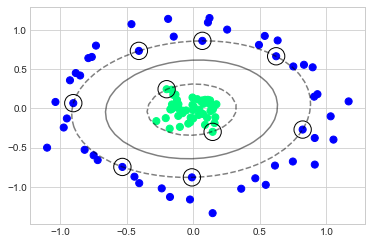

In [135]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(model)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

#### 2.1.3. Tuning the SVM

<p>In real world, we generally don't find such clean dataset of sepratable classes. Here is an example:</p>

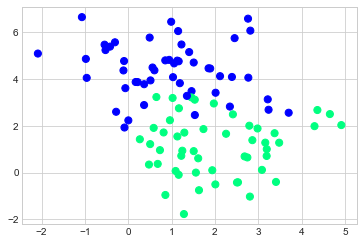

In [136]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter');

<p>In order to allow better fit, we need to add some felxibility to selection of support vectors and computation margins. Here is where you need to use <b><i>C</i></b> hyperparameter to soften the margin. For very large C, the margin is hard, and points cannot lie in it. For smaller C, the margin is softer, and can grow to encompass some points.</p>

<p>Let's see the result of classifying last example using linear SWM with different C values.</p>

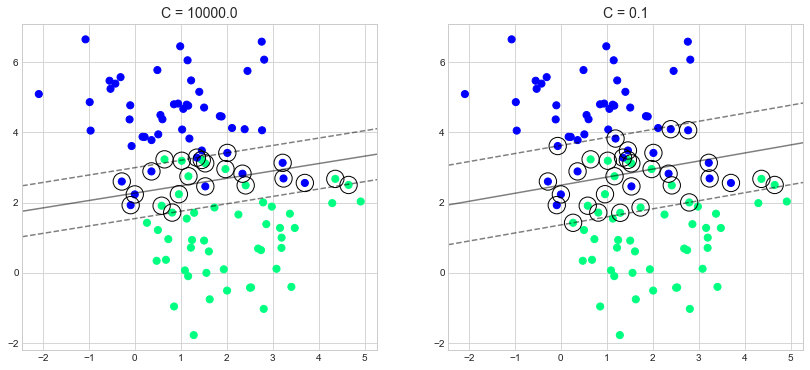

In [137]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
for i, C in enumerate([10000,.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    ax[i].scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
    plot_svc_decision_function(model, ax[i]) 
    ax[i].set_title('C = {0:.1f}'.format(C), size=14)

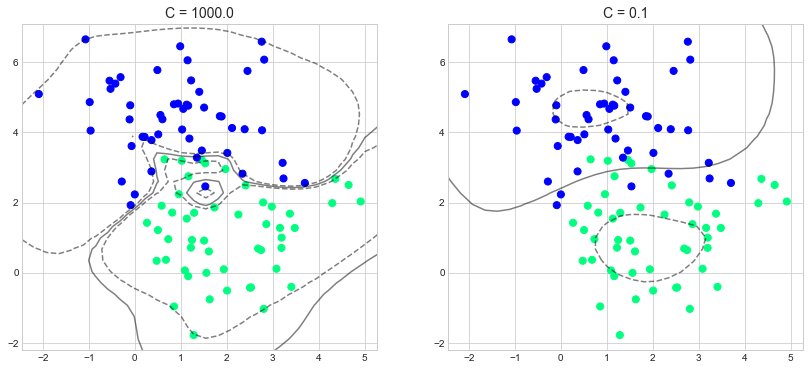

In [153]:
# let's see the result with nonlinear kernel
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
for i, C in enumerate([1000,.1]):
    model = SVC(kernel='rbf', C=C, gamma='auto').fit(X, y)
    ax[i].scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
    plot_svc_decision_function(model, ax[i], plot_support=False) 
    ax[i].set_title('C = {0:.1f}'.format(C), size=14)

<p><b>Note:</b> The optimal value for C depends on the dataset and you need to capture that by measuring the performance of your classifier for different value of C. Cross Validation is a useful tool to find the best value for C.</p>

<P><b>Note:</b> The other important hyperparameter in SVM is $gamma$. Low values make the influence of each example felt quite far. Since many points have to be considered, the SVM curve will tend to take a shape less influenced by local points and the result will be a morbid contour curve. High values of gamma, instead, make the curve take into account more of how points are arranged locally. </p>

<hr />

<p><b>Example:</b> Apply SVM for face recognition.</p>

In [159]:
# For this example we use Wild dataset containing several thousand collated photos of various public figures
from sklearn.datasets import fetch_lfw_people 
faces = fetch_lfw_people(min_faces_per_person=60) 
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


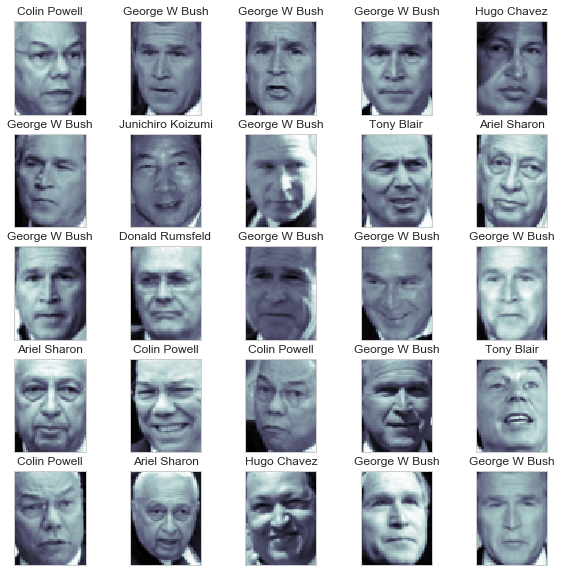

In [160]:
fig, ax = plt.subplots(5, 5, figsize=(10, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set_title(faces.target_names[faces.target[i]])
    axi.set(xticks=[], yticks=[])

In [161]:
faces.data.shape

(1348, 2914)

In [162]:
# While we can consider each pixel as a feature
# It is much more managable if we first reduce the dimension
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
# InitializeDimension Reduction model
pca = PCA(svd_solver='randomized', n_components=150, whiten=True, random_state=0)
# Initialize SVC model
svc = SVC(kernel='rbf',  class_weight='balanced')
# Create pipleline model
model = make_pipeline(pca, svc)

In [163]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=0)

In [164]:
# Let's apply grid search with cross validation to find the best value for C and gamma
from sklearn.model_selection import GridSearchCV 
param_grid = {'svc__C': [.1, 1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, cv = 10, scoring='accuracy')
%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: user 3min 13s, sys: 5.48 s, total: 3min 19s
Wall time: 2min 37s
{'svc__C': 1, 'svc__gamma': 0.005}


In [166]:
bestModel = grid.best_estimator_
y_test_hat = bestModel.predict(Xtest)

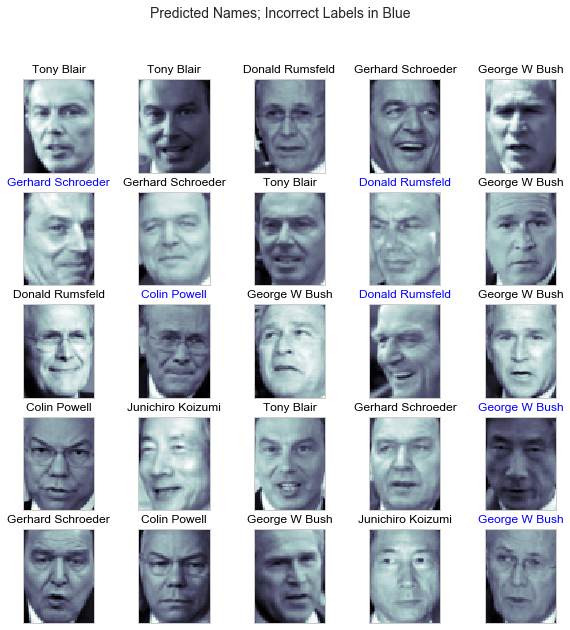

In [167]:
fig, ax = plt.subplots(5, 5, figsize=(10, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set_title(faces.target_names[y_test_hat[i]], 
                  color='black' if y_test_hat[i] == ytest[i] else 'blue')
    axi.set(xticks=[], yticks=[])
    
fig.suptitle('Predicted Names; Incorrect Labels in Blue', size=14);

In [168]:
from sklearn.metrics import classification_report 
print(classification_report(ytest, y_test_hat, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.86      0.75      0.80        16
     Colin Powell       0.74      0.90      0.81        61
  Donald Rumsfeld       0.74      0.74      0.74        35
    George W Bush       0.88      0.91      0.89       125
Gerhard Schroeder       0.81      0.72      0.76        29
      Hugo Chavez       1.00      0.74      0.85        19
Junichiro Koizumi       1.00      0.76      0.87        17
       Tony Blair       0.90      0.80      0.85        35

      avg / total       0.85      0.84      0.84       337



In [169]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, y_test_hat)

array([[ 12,   3,   1,   0,   0,   0,   0,   0],
       [  1,  55,   2,   2,   1,   0,   0,   0],
       [  0,   3,  26,   4,   1,   0,   0,   1],
       [  1,   7,   3, 114,   0,   0,   0,   0],
       [  0,   1,   2,   3,  21,   0,   0,   2],
       [  0,   3,   0,   2,   0,  14,   0,   0],
       [  0,   0,   0,   4,   0,   0,  13,   0],
       [  0,   2,   1,   1,   3,   0,   0,  28]])

### 2.2. SVM for Regression (SVR)

<p>In simple regression we try to minimise the error rate. While in SVR we try to fit the error within a certain threshold. The theoretical properties of SVR is beyond this course. We just use SVR as a black box. However, if you are interested to know more about it, you can check <a herf='https://alex.smola.org/papers/2003/SmoSch03b.pdf'>here</a></p>

In [176]:
# In this part we will use California Housing Dataset
data = pd.read_csv('./California_Housing/housing.csv')
print(data.shape)
data.head()

(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [177]:
# Step1. Check for the null values
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<p><b>Question:</b> What is the best approach to handle null values in this case?</p>

In [178]:
data = data.dropna()
data.shape

(20433, 10)

In [179]:
# step1. Remove longitude and latitude from dataset
data = data.drop(['longitude','latitude'],axis = 1)
# Step 2. convert ocean_proximity to dummy variables
data = pd.get_dummies(data)
data.sample(10)

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
18818,40.0,690.0,129.0,305.0,110.0,2.3625,62500.0,0,1,0,0,0
18086,25.0,4111.0,538.0,1585.0,568.0,9.2298,500001.0,1,0,0,0,0
12121,35.0,3623.0,841.0,2721.0,766.0,2.1574,86900.0,0,1,0,0,0
9002,48.0,1172.0,205.0,497.0,190.0,3.8250,183000.0,1,0,0,0,0
19240,17.0,1090.0,164.0,473.0,163.0,5.5061,231800.0,1,0,0,0,0
3732,30.0,2008.0,513.0,1052.0,496.0,3.0119,262200.0,1,0,0,0,0
16517,31.0,699.0,186.0,460.0,170.0,2.7443,94200.0,0,1,0,0,0
14474,25.0,4229.0,601.0,1634.0,574.0,6.3955,316700.0,0,0,0,0,1
9919,17.0,851.0,118.0,370.0,123.0,5.0877,209300.0,0,0,0,1,0
18480,17.0,6725.0,1051.0,3439.0,1027.0,6.4313,393100.0,1,0,0,0,0


<p><b>Note:</b> If you convert a categorical variable with n possible unique value to dummy variables then you will have n unique variables. However, you need to keep in mind that you can only use n-1 variables in your models.</p>

In [180]:
# let's drop 'ocean_proximity_<1H OCEAN' in our data set
data = data.drop('ocean_proximity_<1H OCEAN',axis = 1)

In [181]:
# let's put our dependent and independent variables in separate variables
# and convert them to numpy arrays
y = np.array(data.median_house_value)
X = np.array(data.drop('median_house_value', axis=1))

<p><b>Note: (Normalization - Standardization)</b> One posible approach to enhance the performance of your machine learning algorithms is to normalize (standardize) your independent variables. That helps you keep all data values in same scale. One common appraoch is to use ($\frac{X-\mu}{\sigma}$) formula. You can use <b style='color:blue'>scale( )</b> function to apply (Normalization - Standardization) to your data.</p>

In [182]:
# Let's apply normalization to X. 
# Keep in mind that you don't need to apply that your dummy variables
from sklearn.preprocessing import scale
X[:,:6] = scale(X[:,:6])

In [190]:
# Create train and test samples
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
model = SVR(kernel='rbf', gamma='auto')
scores = cross_val_score(model, X, y, cv = 3, scoring='neg_mean_squared_error')
scores
#array([-1.35928340e+10, -1.24041352e+10, -1.61390685e+10])
# rbf is non-linear regression kernel (default kernel is rbf)

array([-1.35928340e+10, -1.24041352e+10, -1.61390685e+10])

<p><b>Question:</b> Run the same model using linear regression and compare the result.</p>

In [189]:
# Write your answer over here

# Create train and test samples
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
model = SVR(kernel='linear', gamma='auto')
scores = cross_val_score(model, X, y, cv = 3, scoring='neg_mean_squared_error')
scores

array([-1.23885981e+10, -1.13250344e+10, -1.48438258e+10])

In [ ]:
#Predicting on holdout Data
#holdout = pd.read_csv
#holdout = holdout[Numeric_Columns].fillna(-1000)
#predictions = clf.predict_proba(holdout)

## 3. Receiver operating characteristics (ROC) and AUC

In last session, we become familiar with measurements such as precision, recall and F1 which allow us to capture the performance of the trained model. We also used the precion-recall curve to measure the performance of the model using different threshold values.

There is another commonly used tool named Receiver operating characteristics curve or ROC curve in short, that allows us to consider all possible thresholds for a given classifier. But instead of reporting precision and recall, it shows the false positive rate (FPR) against the true positive rate (TPR). Recall that the true positive rate is simply another name for recall, while the false positive rate is the fraction of false positives out of all negative samples. 

<b>Example:</b> Let's consider the Wisconsin Breast Cancer Example once again 

In [68]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

breast_cancer_dataset = datasets.load_breast_cancer()

X = breast_cancer_dataset.data       
y = breast_cancer_dataset.target            # 0 -> Malignant ; 1 -> Benign

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

logreg_model = LogisticRegression(solver='liblinear')
logreg_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

<b>Note:</b> You can use <b style='color:blue'>roc_curve</b> function in sklearn package to form ROC curve

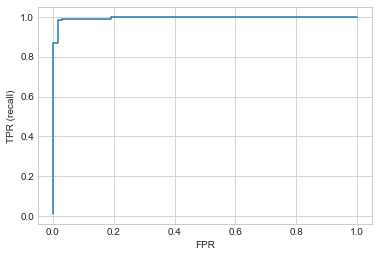

In [69]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, logreg_model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)");

In [72]:
thresholds

array([9.99888541e-01, 8.44002078e-01, 8.41974975e-01, 3.63278674e-01,
       2.62954034e-01, 2.27726340e-01, 5.46676002e-02, 4.30674921e-02,
       9.86607388e-21])

In [73]:
fpr

array([0.        , 0.        , 0.01587302, 0.01587302, 0.03174603,
       0.03174603, 0.19047619, 0.19047619, 1.        ])

In [74]:
tpr

array([0.00925926, 0.87037037, 0.87037037, 0.98148148, 0.98148148,
       0.99074074, 0.99074074, 1.        , 1.        ])

In [ ]:
y_pred_prob =logreg.predict_proba(X_test)[:,1]
fpr,tpr, threshold= roc_curve(y_test,y_pred_prob)

For the ROC curve, the ideal curve is close to the top left: you want a classifier that produces a high recall while keeping a low false positive rate.

<b>Note:</b> The point (threshold) closest to the top left might be a better operating point than the one chosen by default (.5). <b>Be aware</b> that choosing a threshold should not be done on the test set, but on a separate <u>validation set</u>.

<b>Question:</b> What is the validation set? why we should use it?

<b>Note:</b> We often want to summarize the ROC curve using a single number, the area under the curve (this is commonly just referred to as the AUC). We can compute the area under the ROC curve using the <b style="color:blue">roc_auc_score</b> function

In [75]:
from sklearn.metrics import roc_auc_score

logreg_auc = roc_auc_score(y_test, logreg_model.predict_proba(X_test)[:,1]) 
print("AUC for logreg: {:.3f}".format(logreg_auc))

AUC for logreg: 0.996


In [ ]:
#AUC using cross val score
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(logreg,X,y, cv=5, scoring='roc_auc')
print(cv_scores)

<b>Note:</b> It is important for you to understand how to interpret ROC and AUC curve. Don't just use numbers